# Treinando um modelo simples usando Keras

O problema é converter de Graus  Celsius para Fahrenheit,  a  fórmula é:

$$ f = c \times 1.8 + 32 $$


No nosso caso, vamos informar valores em Celsius  (0, 8, 15, 22, 38) and seus correspondenets em Fahrenheit (32, 46, 59, 72, 100).

Então, vamos treinar o modelo para "APRENDER" A fórmula acima.

![alt text](https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/temperatures.png)

## Importando dependências e bibliotecas


In [ ]:
#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

##  dados de treino

temperaturas em Graus Celsius e Graus Fahrenheit

In [ ]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=np.float64)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=np.float64)

for i,c in enumerate(celsius_q):
  print("{} Graus Celsius = {} Graus Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 Graus Celsius = -40.0 Graus Fahrenheit
-10.0 Graus Celsius = 14.0 Graus Fahrenheit
0.0 Graus Celsius = 32.0 Graus Fahrenheit
8.0 Graus Celsius = 46.0 Graus Fahrenheit
15.0 Graus Celsius = 59.0 Graus Fahrenheit
22.0 Graus Celsius = 72.0 Graus Fahrenheit
38.0 Graus Celsius = 100.0 Graus Fahrenheit


## Criando o modelo


### Construindo camadas


Parâmetros de configuração:


*   `input_shape=[1]` — O shape dos dados de entrada. No nosso exemplo, o tamanho é igual a 1 (Uma temperatura em Graus Celsius)


*   `units=1` — O Número de neurônios da camada. (Colocamos somente 1 neurônio, mas, dependendo do problema, podemos variar 10, 100, 1000 neurônioas, etc)



In [ ]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Construindo Layers (camadas) no modelo


Este modelo tem somente uma camada ou  layer (layer0)

In [ ]:
model = tf.keras.Sequential([layer0])

## Compilar o modelo, com o loss (função de peda) and função de otimização
:

- **Loss function** — Função de perda - Forma de medir o quanto as previsões estão próximas dos resultados ( y  e ypred).  Essa diferença é chamada de perda, função de custo ou "loss"

- **Optimizer function** — A forma de adjustar o pesos internos com o objetivo de reduzir a perda



In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.AdamW(0.2))



A função de perda -  loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) e o otimizador  ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) foram usados neste modelo.

Precisamento definir no Otimizador, a taxa de aprendizado (learning rate), valor 0.1 acima.
Se a taxa de aprendizagem é muito pequena, o modelo precisará de muitas iterações para treinar o modelo. Se for muito grande, poderá ter uma acurácia menor.
Um bom valor de learning rate necessita de tentativa e erro, mas é muito comum um valor entre 0.001 (default) e 0.1.


## Treinando o modelo

Train the model by calling the `fit` method.

No treinamento do modelo, são encontrando os pesos (weights).
Inicialmente os pesos são inicializados randomicamente. A diferença entre a saída atual (y_previsto) e a saída desejada (y) é calculada usando a função de perda (loss function), e o otimizador acha quais os pesos ideais.

Este ciclo de calcular, comparar e ajustar os pesos é controlado pelo método `fit`.

As épocas (`epochs`) es.pecifica quantas vezes vamos integir como todo o conjunto de dados de entrada (X).


In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [ ]:
#history.history['loss']

## Display training statistics

O métido  `fit` retorna um objeto 'history' que contem o erro (loss) de cada época de treinamento.





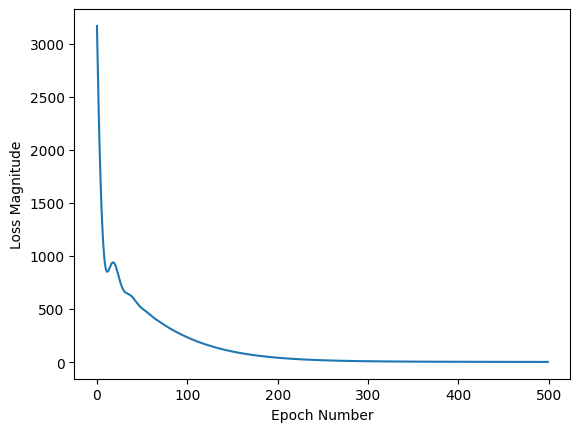

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usando o modelo prever novos valores


In [ ]:
a = np.array([100.0], dtype=np.float32).reshape(-1,1)
print('previsão:', model.predict(a)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
previsão: 211.40071


A resposta correta é $100 \times 1.8 + 32 = 212$, e nosso modelo preveu o valor de 211.7474 (erro de 0.2526, muito próximo)


## a Matriz de pesos (layer weights)


In [ ]:
print("Matriz de pesos: {}".format(layer0.get_weights()))

Matriz de pesos: [array([[1.808926]], dtype=float32), array([30.508123], dtype=float32)]


A primeira variável está próxima a  ~1.8 e a segunda a  ~32. Esses valores (1.8 and 32) são os valores reais da fórmula de conversão.

Fórmula $y = mx + b$, onde, $f = 1.8c + 32$.
Fórmula aprendida $f = 1.820181c + 29.3202$.


### Melhorando a previsão

Vamos colocar mais camadas, para tentar melhorar a precisão.

In [ ]:
l0 = tf.keras.layers.Dense(units=8, input_shape=[1])  # 4
l1 = tf.keras.layers.Dense(units=12) #10
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.AdamW(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False) # 600
print("Treinamento concluído")
print('Temperatura Prevista:',model.predict(np.array(100.0).reshape(1,-1))[0][0])
print()
print()
print("pesos da camada l0: {}".format(l0.get_weights()))
print("pesos da camada l1: {}".format(l1.get_weights()))
print("pesos da camada l2: {}".format(l2.get_weights()))

Treinamento concluído
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Temperatura Prevista: 211.74307


pesos da camada l0: [array([[ 0.1256449 ,  0.32327127,  0.04830517, -0.04668128, -0.09804504,
        -0.41156635,  0.00823608, -0.03481393]], dtype=float32), array([ 1.7763466,  1.9839301,  1.7193816, -1.6584059,  1.1288612,
       -1.9946377, -1.3952969, -1.1601317], dtype=float32)]
pesos da camada l1: [array([[ 0.6093714 ,  0.38294667,  0.59829044,  0.15447481,  0.7343273 ,
        -0.5691644 ,  0.60846156,  0.06500284, -0.5100119 , -0.1955472 ,
         0.08711836, -0.20616175],
       [ 0.10938822,  0.289405  ,  0.37545016,  0.38507083,  0.10296487,
        -0.4605735 ,  0.31735766,  0.66342604, -0.6163427 , -0.20320418,
         0.51200444, -0.7179817 ],
       [ 0.04568121,  0.29075024,  0.42094925,  0.10584235,  0.60231924,
        -0.618615  ,  0.23467802,  0.26876295, -0.5566282 , -0.11308932,
         0.35230723, -0.6141354 ],
       [-0.16990212, -0.5634868 , -0.2057063 , -0.27604

Melhorando os dados de Treino

In [ ]:
celsius_q    = [] #np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=np.float64)
fahrenheit_a = [] #np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=np.float64)
#𝑓=1.8𝑐+32

for i in range(-10000, 10001):
    celsius = i
    fahrenheit = 1.8 * celsius + 32
    celsius_q.append(celsius)
    fahrenheit_a.append(fahrenheit)

celsius_q    =  np.array(celsius_q,  dtype=np.float64)
fahrenheit_a =  np.array(fahrenheit_a,  dtype=np.float64)

for i,c in enumerate(celsius_q):
  if i % 1000 == 0:
    print("{} Graus Celsius = {} Graus Fahrenheit".format(c, fahrenheit_a[i]))

-10000.0 Graus Celsius = -17968.0 Graus Fahrenheit
-9000.0 Graus Celsius = -16168.0 Graus Fahrenheit
-8000.0 Graus Celsius = -14368.0 Graus Fahrenheit
-7000.0 Graus Celsius = -12568.0 Graus Fahrenheit
-6000.0 Graus Celsius = -10768.0 Graus Fahrenheit
-5000.0 Graus Celsius = -8968.0 Graus Fahrenheit
-4000.0 Graus Celsius = -7168.0 Graus Fahrenheit
-3000.0 Graus Celsius = -5368.0 Graus Fahrenheit
-2000.0 Graus Celsius = -3568.0 Graus Fahrenheit
-1000.0 Graus Celsius = -1768.0 Graus Fahrenheit
0.0 Graus Celsius = 32.0 Graus Fahrenheit
1000.0 Graus Celsius = 1832.0 Graus Fahrenheit
2000.0 Graus Celsius = 3632.0 Graus Fahrenheit
3000.0 Graus Celsius = 5432.0 Graus Fahrenheit
4000.0 Graus Celsius = 7232.0 Graus Fahrenheit
5000.0 Graus Celsius = 9032.0 Graus Fahrenheit
6000.0 Graus Celsius = 10832.0 Graus Fahrenheit
7000.0 Graus Celsius = 12632.0 Graus Fahrenheit
8000.0 Graus Celsius = 14432.0 Graus Fahrenheit
9000.0 Graus Celsius = 16232.0 Graus Fahrenheit
10000.0 Graus Celsius = 18032.0 Gra

In [ ]:
len(celsius_q)

20001

# Melhorando a precisão do Modelo

In [ ]:
import matplotlib.pyplot as plt

def plotg(history):
  plt.xlabel('Epoch Number')
  plt.ylabel("Loss Magnitude")
  plt.plot(history.history['loss'])

In [ ]:
celsius_q.shape, fahrenheit_a.shape

((20001,), (20001,))

In [ ]:
celsius_q.reshape(-1,1).shape

(20001, 1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1971087.2500
Epoch 2/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 860.4899
Epoch 3/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 646.5256
Epoch 4/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 383.4695
Epoch 5/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 145.5659
Epoch 6/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.3603
Epoch 7/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0125
Epoch 8/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.1651
Epoch 9/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92.0190
Epoch 10/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5217
Epoch 11/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 242.3074
Epoch 12/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 308.3984
Epoch 13/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1060.9135
Epoch 14/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.5296
Epoch 15/50
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s

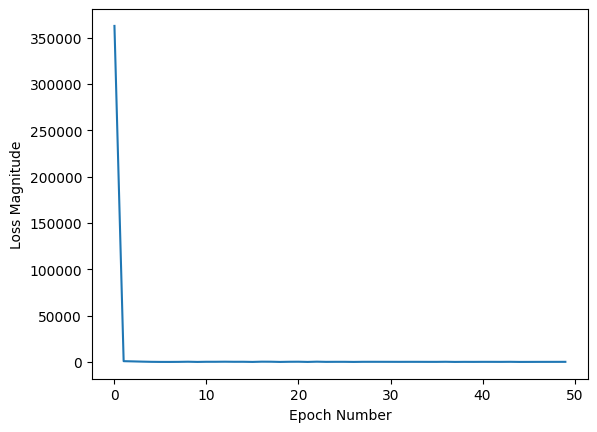

In [ ]:
%%time

tf.keras.backend.set_floatx('float64')

l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  # 4 #Input(shape=1)
l1 = tf.keras.layers.Dense(units=10) #10
l11 = tf.keras.layers.Dense(units=10) #10
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l11, l2])

import os

folder = 'models'
file = 'best_weights.keras'
url = os.path.join(folder, file)
os.makedirs(folder, exist_ok=True)
checkpoint_filepath = 'best_weights.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=url,
    monitor='loss',
    verbose=0,
    save_best_only=True,
)

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adamax(0.01))  #.Lamb(0.1))# 212

epochs = 50 # 150 # 180 # 300 # 220 #100 #220
history = model.fit(celsius_q, fahrenheit_a, epochs=epochs, verbose=1, callbacks=[model_checkpoint_callback]) # 600 800

model.load_weights(url)

print("Treinamento concluído")
print('\nTemperatura Observada: 212.0')
print('Temperatura Prevista:',model.predict(np.array(100.0).reshape(1,-1))[0][0])
print('Erro:', 212.0 - model.predict(np.array(100.0).reshape(1,-1))[0][0])
print()
print()
print("\npesos da camada l0: {}".format(l0.get_weights()))
print("pesos da camada l1: {}".format(l1.get_weights()))
print("pesos da camada l2: {}".format(l2.get_weights()))
print('\nTemperatura Observada: 212.0')
print('Temperatura Prevista:',model.predict(np.array(100.0).reshape(1,-1))[0][0])

#print('Erro:', 212.0 - model.predict(np.array(100.0).reshape(1,1))[0][0])

print('Erro:', 212.0 - model.predict(np.array(100.0).reshape(1,-1))[0][0]) #this line is correct


from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(celsius_q.reshape(-1, 1))
y_true = fahrenheit_a
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plotg(history)

# Epoca de menor erro
print('\nEpoca de menor erro')
epoch_min_error = np.argmin(history.history['loss'])
print('\nEpoca de menor erro', epoch_min_error)
print('Erro:', history.history['loss'][epoch_min_error])
print('\nTemperatura Observada: 212.0')
print('Temperatura Prevista:',model.predict(np.array(100.0).reshape(1,-1))[0][0])

626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 0.013104076986771771
R-squared: 0.999999999878678

Epoca de menor erro

Epoca de menor erro 21
Erro: 7.767546845465227e-05

Temperatura Observada: 212.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Temperatura Prevista: 211.99774


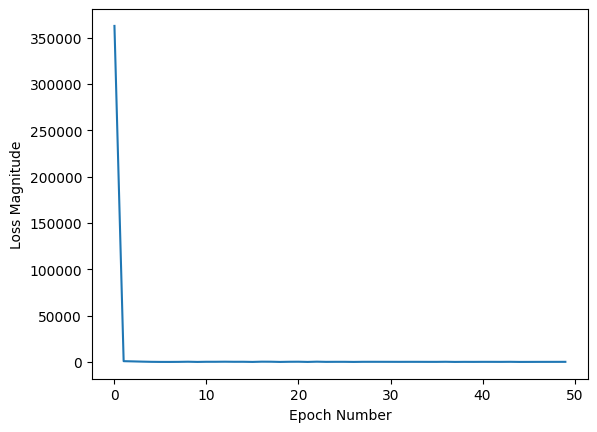

In [ ]:
y_pred = model.predict(celsius_q.reshape(-1, 1))
y_true = fahrenheit_a
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plotg(history)

# Epoca de menor erro
print('\nEpoca de menor erro')
epoch_min_error = np.argmin(history.history['loss'])
print('\nEpoca de menor erro', epoch_min_error)
print('Erro:', history.history['loss'][epoch_min_error])
print('\nTemperatura Observada: 212.0')
print('Temperatura Prevista:',model.predict(np.array(100.0).reshape(1,-1))[0][0])

In [ ]:
# colocar em Escala

def escala(X, mean=None, std=None):
  if mean is None:
    mean = np.mean(X)
  if std is None:
    std = np.std(X)
  X = (X - mean) / std
  #X = np.array(X,  dtype=np.float64)
  #x = (X - np.mean(X)) / np.std(X)
  return X, mean, std

def inv_escala(X, mean, std):
  X = X * std + mean
  return X

escala_celsius, mean, std   =  escala(celsius_q)
print(celsius_q[:3])
print(escala_celsius[:3])
print(inv_escala(escala_celsius, mean, std)[:3])
print(mean, std)

[-10000.  -9999.  -9998.]
[-1.73196421 -1.73179102 -1.73161782]
[-10000.  -9999.  -9998.]
0.0 5773.791359814335


In [ ]:
escala_celsius.shape[0]

20001

Epoch 1/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 67038632.0000
Epoch 2/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7268e-05
Epoch 3/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7354e-05
Epoch 4/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1339e-05
Epoch 5/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8056e-06
Epoch 6/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2685e-06
Epoch 7/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4701e-07
Epoch 8/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8124e-07
Epoch 9/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0098e-07
Epoch 10/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6586e-06
Treinamento concluído

Temperatura Observada: 212.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Temperatura Prevista: 211.99977
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Erro: 0.0002288818359375



pesos da camada l0: [array([[-1.5987338, -1.9799302, -1.7970945, -1.9657074,  2.3162744,
        

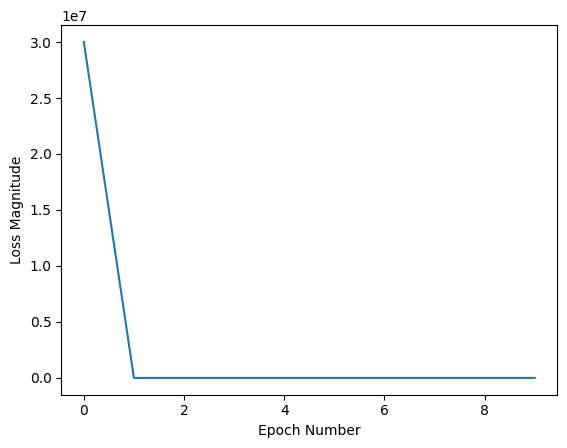

In [ ]:
%%time

tf.keras.backend.set_floatx('float64')
from sklearn.metrics import mean_squared_error, r2_score
import os

linput = tf.keras.layers.Input(shape=(1,))
l0 = tf.keras.layers.Dense(units=6)  # 4
l1 = tf.keras.layers.Dense(units=12) #10
l2 = tf.keras.layers.Dense(units=12) #10
lout = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([linput, l0, l1, l2, lout])


folder = 'models'
file = 'best_weights.keras'
url = os.path.join(folder, file)
os.makedirs(folder, exist_ok=True)
checkpoint_filepath = 'best_weights.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=url,
    monitor='loss',
    verbose=0,
    save_best_only=True,
)

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adamax(0.01))  #.Lamb(0.1))# 212

epochs = 10 #150 # 180 # 300 # 220 #100 #220
history = model.fit(escala_celsius, fahrenheit_a, epochs=epochs, verbose=1, callbacks=[model_checkpoint_callback]) # 600 800 celsius_q

model.load_weights(url)

print("Treinamento concluído")
print('\nTemperatura Observada: 212.0')

temperatura = np.array(100).reshape(-1,1)
temperatura_escala, _, _ = escala(temperatura, mean, std)

print('Temperatura Prevista:',model.predict(temperatura_escala)[0][0])
print('Erro:', 212.0 - model.predict(temperatura_escala)[0][0])
print()
print()
print("\npesos da camada l0: {}".format(l0.get_weights()))
print("pesos da camada l1: {}".format(l1.get_weights()))
print("pesos da camada l2: {}".format(l2.get_weights()))
print('\nTemperatura Observada: 212.0')
print('Temperatura Prevista:',  model.predict(np.array(temperatura_escala).reshape(-1,1)))
print('Erro:', 212.0 - model.predict(np.array(temperatura_escala).reshape(-1,1))[0][0] )

y_pred = model.predict(escala_celsius.reshape(-1, 1))
y_true = fahrenheit_a
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plotg(history)

# Epoca de menor erro
epoch_min_error = np.argmin(history.history['loss'])
print('\nEpoca de menor erro:', epoch_min_error + 1)
print('Erro:', history.history['loss'][epoch_min_error])
print('\nTemperatura Observada: 212.0')

temperatura = np.array(100).reshape(-1,1)
temperatura_escala, _, _ = escala(temperatura, mean, std)
print('Temperatura Prevista:',  model.predict(np.array(temperatura_escala).reshape(-1,1))[0][0])